In [26]:
# data downloaded from http://https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\TomaszLasota\AppData\Local\Temp\ipykernel_28408\896618254.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load and explore the dataset

In [2]:
# load dataset
df = pd.read_csv("creditcard_2023.csv")
pd.set_option("display.max_columns", None)
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
# check for null values and the size of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
# the for the highest number of null values in the dataset
df.isnull().sum().max()
# good - no null values

0

In [5]:
# check what variables we have in this dataset
df.columns
# good - no repeated variables as far as we know based on the column names 

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# check id all IDs are unique
df["id"].is_unique
# good - it seems all entries are unique

True

In [7]:
# check basic statistics of the dataset
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
# check distribution of the class variable
df["Class"].value_counts()
# unsualually good distribution of the class labels (the data was probably already pre-processed to balance the class)

Class
0    284315
1    284315
Name: count, dtype: int64

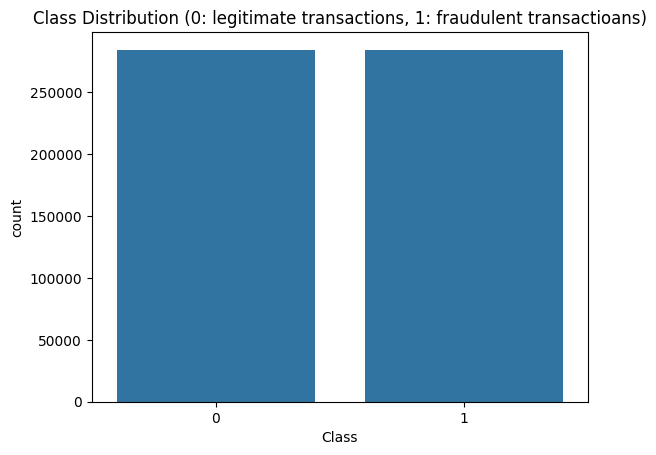

In [9]:
# plot the distribution
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0: legitimate transactions, 1: fraudulent transactioans)")
plt.show()

In [10]:
# we don't really know what features are actually contained within our dataset apart from the class and amount
# let's look at the distribution of the amount variable 


In [11]:
# check for fidderence in spending behaviour between fradulent and non-fradulent transactions
df[df["Class"] == 1].Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [12]:
df[df["Class"] == 0].Amount.describe()

# seems the spending behaviour is very similar between the class labels

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

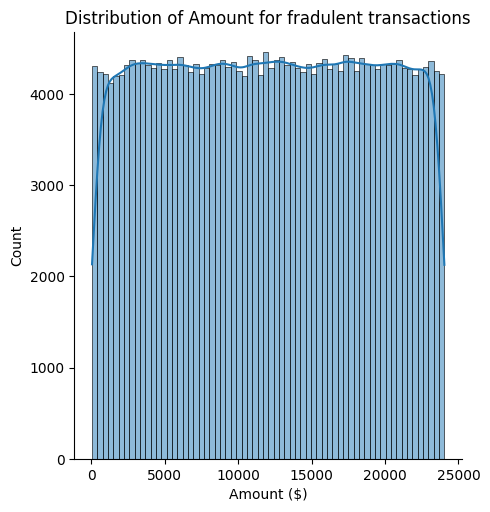

In [13]:
# check the distribution of Amount variable for both class labels

sns.displot(df[df["Class"] == 1].Amount, kde=True)
plt.title("Distribution of Amount for fradulent transactions")
plt.xlabel("Amount ($)")
plt.show()
# check the distribution of Amount variable for both class labels

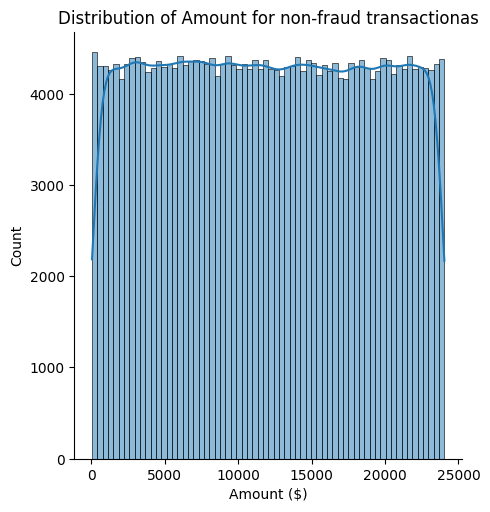

In [14]:
sns.displot(df[df["Class"] == 0].Amount, kde=True)
plt.title("Distribution of Amount for non-fraud transactionas")
plt.xlabel("Amount ($)")
plt.show()
# seems like both types of transactions do not differ based on the amount spent

<Axes: >

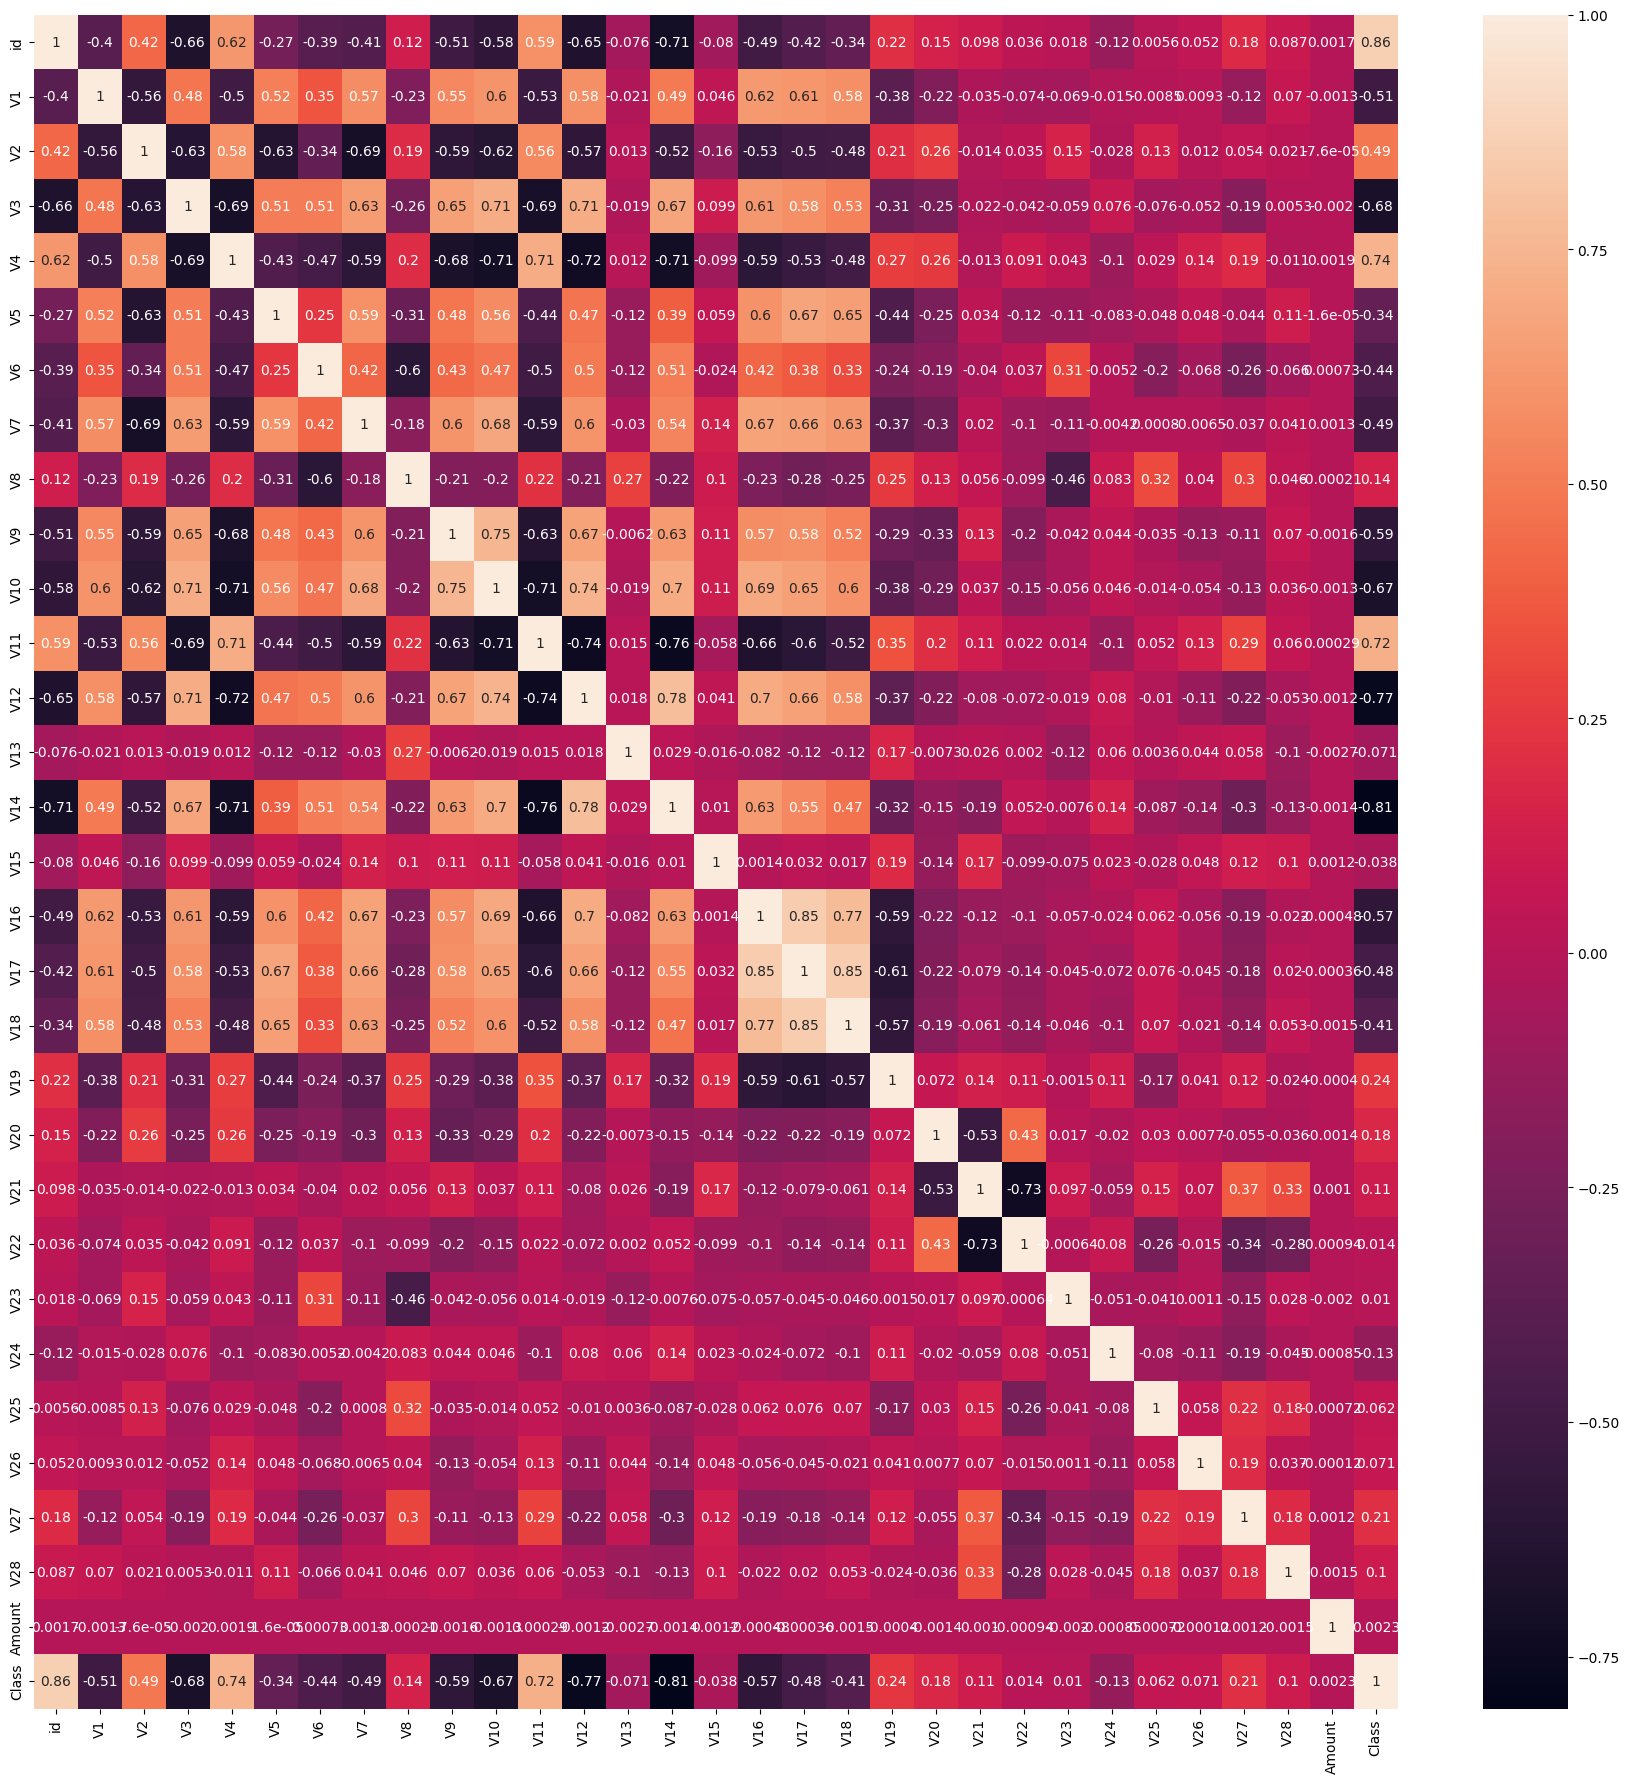

In [15]:
# check correlation of all the features in the dataset
corr_matrix = df.corr()
top_features = corr_matrix.index
plt.figure(figsize= (22, 22))

sns.heatmap(df[top_features].corr(), annot=True)

In [16]:
# here we can actually see that the amount spent is not correlated to the class variable or any other feature

Text(0.5, 1.0, 'V3 vs Class: -ve correlation')

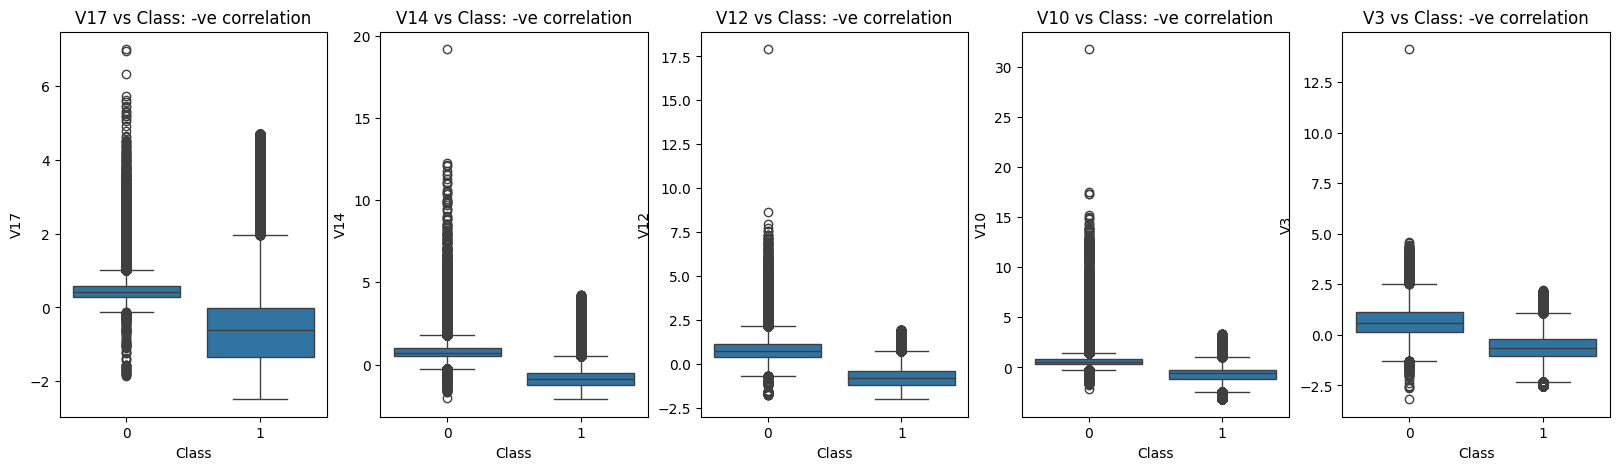

In [17]:
# use boxplots to understand the distribution of correlated features in normal and fraud transactions.
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))

sns.boxplot(x="Class", y="V17", data=df, ax=ax[0])
ax[0].set_title("V17 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V14", data=df, ax=ax[1])
ax[1].set_title("V14 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V12", data=df, ax=ax[2])
ax[2].set_title("V12 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V10", data=df, ax=ax[3])
ax[3].set_title("V10 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V3", data=df, ax=ax[4])
ax[4].set_title("V3 vs Class: -ve correlation")

Text(0.5, 1.0, 'V11 vs Class: +ve correlation')

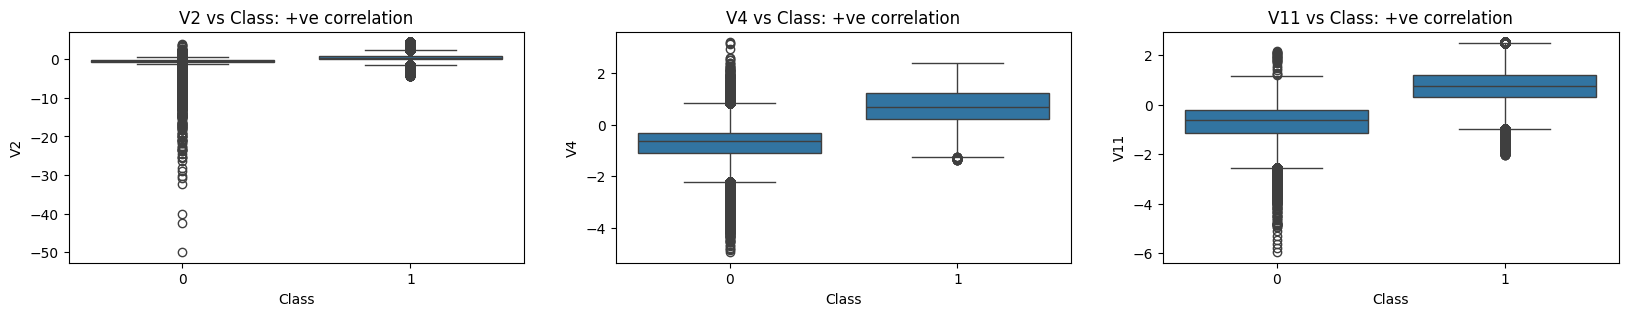

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 3))

sns.boxplot(x="Class", y="V2", data=df, ax=ax[0])
ax[0].set_title("V2 vs Class: +ve correlation")
sns.boxplot(x="Class", y="V4", data=df, ax=ax[1])
ax[1].set_title("V4 vs Class: +ve correlation")
sns.boxplot(x="Class", y="V11", data=df, ax=ax[2])
ax[2].set_title("V11 vs Class: +ve correlation")

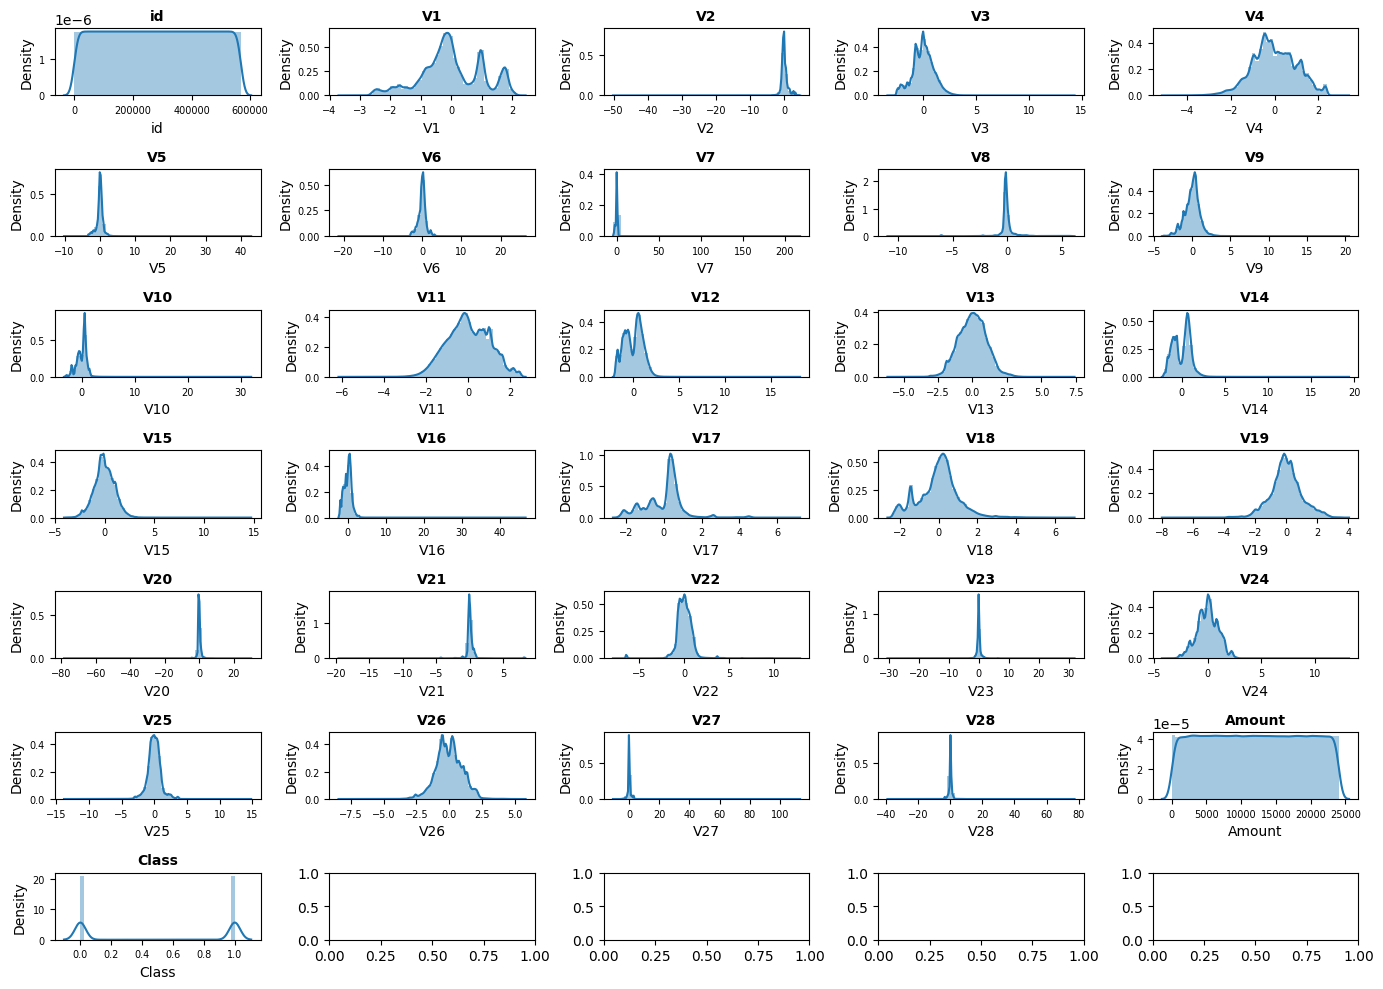

In [19]:
# explore distributions of other features
import math

num_features = len(df.columns)
n_cols = 5
n_rows = math.ceil(num_features / n_cols)

fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(14, 10))

for idx, col_name in enumerate(df.columns):
    i, j = divmod(idx, n_cols)

    sns.distplot(df[col_name], ax=ax[i, j])
    ax[i, j].set_title(col_name, fontsize=10, fontweight="bold")
    ax[i, j].tick_params(labelsize=7)

plt.tight_layout()
plt.show()


Dataset Preprocessing

In [20]:
# boxplots showed a rather large number of outliers in the features strongly correlated with the class 
# which might have an impact on accuracy of our models.
# In this step we will try to remove extreme outliers

# define a function for calculating 25 and 75 procentile and IQR (interquartile range) which will form the basis
# for filtering out extreme outliers 

import numpy as np

# function for calculating IQR and lower and uppder cut offsets
def calculate_IQR(df, col_name, factor):
    fraud = df[col_name].loc[df["Class"] == 1].values
    Q1 = np.percentile(fraud, 25)
    Q3 = np.percentile(fraud, 75)
    Q1
    IQR = Q3 - Q1
    cut_off = IQR * factor
    lower_coff, upper_coff = Q1 - cut_off, Q3 - cut_off
    return lower_coff, upper_coff

col_names = ["V2"]
lower_coff, upper_coff = calculate_IQR(df, col_names[0], 1.001)
df1 = df.drop(df[(df[col_names[0]] > upper_coff) | (df[col_names[0]] < lower_coff)].index)


df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 284584 entries, 0 to 568628
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      284584 non-null  int64  
 1   V1      284584 non-null  float64
 2   V2      284584 non-null  float64
 3   V3      284584 non-null  float64
 4   V4      284584 non-null  float64
 5   V5      284584 non-null  float64
 6   V6      284584 non-null  float64
 7   V7      284584 non-null  float64
 8   V8      284584 non-null  float64
 9   V9      284584 non-null  float64
 10  V10     284584 non-null  float64
 11  V11     284584 non-null  float64
 12  V12     284584 non-null  float64
 13  V13     284584 non-null  float64
 14  V14     284584 non-null  float64
 15  V15     284584 non-null  float64
 16  V16     284584 non-null  float64
 17  V17     284584 non-null  float64
 18  V18     284584 non-null  float64
 19  V19     284584 non-null  float64
 20  V20     284584 non-null  float64
 21  V21     284584 

Text(0.5, 1.0, 'V3 vs Class: -ve correlation')

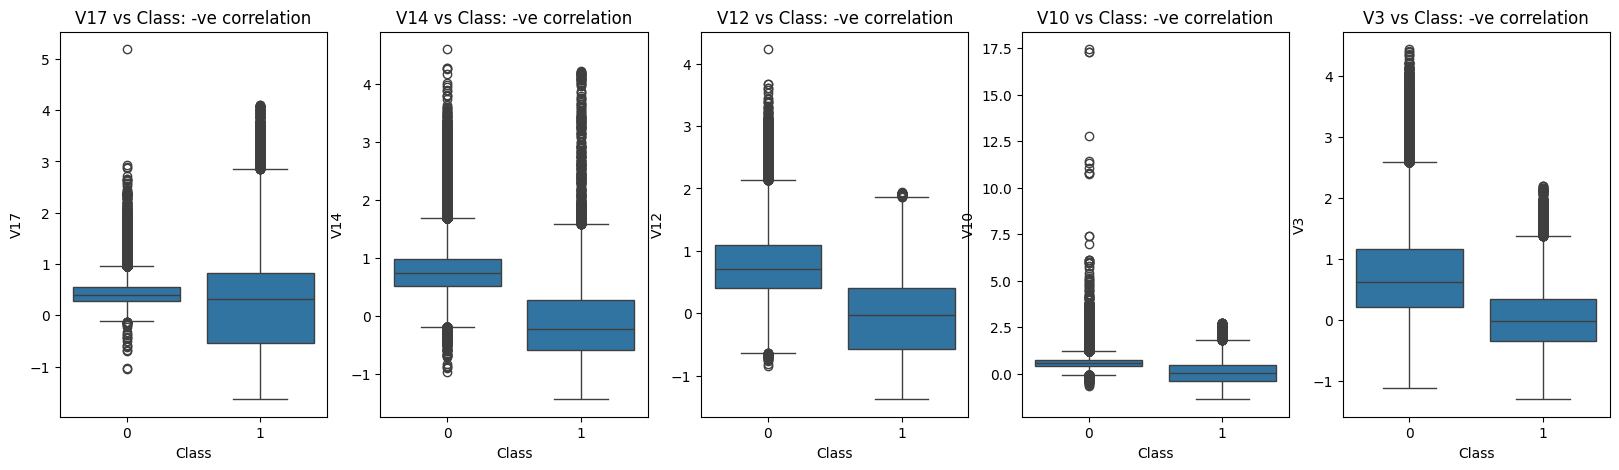

In [25]:
# use boxplots to understand the distribution of correlated features in normal and fraud transactions after outliers
# removal.
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))

sns.boxplot(x="Class", y="V17", data=df1, ax=ax[0])
ax[0].set_title("V17 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V14", data=df1, ax=ax[1])
ax[1].set_title("V14 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V12", data=df1, ax=ax[2])
ax[2].set_title("V12 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V10", data=df1, ax=ax[3])
ax[3].set_title("V10 vs Class: -ve correlation")
sns.boxplot(x="Class", y="V3", data=df1, ax=ax[4])
ax[4].set_title("V3 vs Class: -ve correlation")

In [21]:
# based on our observations in the data exploration section, though the dataset is well balanced, it is not scalled
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# first we split the dataset into training and testing. We perform the split before scaling to avoid any data leakage
#(this ensures the information form the test set does not infulense the scaling process)
X = df1.drop(columns = ["Class", "id"], axis=1)
y = df1["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply scaler (less sensitive to outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model - Support Vector Machine

In [22]:
# import  and initialize models
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)



In [23]:
# create classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44874
           1       0.99      1.00      0.99     12043

    accuracy                           1.00     56917
   macro avg       0.99      1.00      1.00     56917
weighted avg       1.00      1.00      1.00     56917



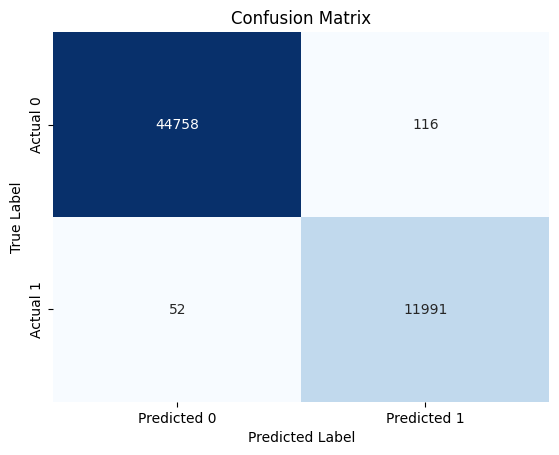

In [24]:
# Create a heatmap using seaborn to visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# save the model
import joblib
joblib.dump(svm, 'svm_project_1.joblib')

Summary

In the evaluation of the Support Vector Machine (SVM) model, an exemplary classification performance was achieved, with both labels correctly classified and an impressive F1 score exceeding 0.99. This outcome underscores the efficacy of the chosen SVM model in the provided context.

It is, however, crucial to acknowledge that the dataset utilized for this analysis appears to have been synthetically generated. The unrealistic distribution of both non-fraud and fraud labels may contribute to the observed high accuracy of the model. It is imperative to recognize this potential artificiality, as it can impact the generalizability of the model to real-world scenarios.

To enhance the robustness and applicability of the model, it is recommended to work with datasets that more closely mirror the imbalanced class labels inherent in real-world fraud detection scenarios. Furthermore, additional preprocessing steps should be implemented to mitigate potential issues related to overfitting.

Additionally, a comprehensive examination of the dataset revealed a notable presence of multicollinearity among a substantial number of features. This observation warrants attention, as multicollinearity can adversely affect both the performance and interpretability of predictive models. Consequently, measures such as feature engineering or dimensionality reduction techniques may be considered to address this challenge and optimize the model's effectiveness.
